Enrich镜像 R(Enrich) kernel

Script='/data/work/scripts/Enrich/Enrich.ipynb'
input1='/data/users/yangdong/yangdong_1ac1874280b1481e90852cb6458b67a1/online/output/PlantPhone/Compare/TM0_TM1/RNA_T_0.5/Conservedmarker_Vasculature_TM0_TM1.csv'
input2='/data/users/yangdong/yangdong_1ac1874280b1481e90852cb6458b67a1/online/output/PlantPhone/Compare/TM0_TM1/RNA_T_0.5/marker_Putative rib_splitedseob_TM0_TM1.csv'
1. 其中input1有两个时期的markergene,可以把GO等图左右排列，方便比较.
2. 另外参照[clusterprofiler-comparecluster.html](https://yulab-smu.top/biomedical-knowledge-mining-book/clusterprofiler-comparecluster.html)做一下`cnetplot`在**不同时期**和**不同clsuter**的**占比比较图**

In [33]:
library(AnnotationDbi)
library(stringr) 
library(clusterProfiler)
library(tidyverse)
library(ggnewscale) 
library(tools)
library(ggpubr) 
library(enrichplot) 
library(ggupset) 
library(stats)
library(data.table)
library(lifecycle)
library(dplyr)
library(ggplot2)
library(topGO) 
library(Rgraphviz) 
library(RColorBrewer)
library(wordcloud) 
library(pathview) 
library(UpSetR) 
library(fgsea)
#library(ITAG4.1_241207.OrgDb)

In [2]:
# library

Tomato <-loadDb(file="/data/users/lili10/online/script/Enrich/clusterProfiler/ITAG4.1_241207.OrgDb")
kegglist <- read.csv('/data/users/lili10/lili10_642e569efa3b4d56a57481c396194c66/online/input/Clusterprofiler/ITAG4.1_Gene_KEGGID_KEGGNAME_241225.csv')
gmt_go <- "/data/users/lili10/lili10_642e569efa3b4d56a57481c396194c66/online/input/Enrich/ITAG4.1_description_GO_Gene_241220.gmt"
gmt_kegg <- '/data/users/lili10/lili10_642e569efa3b4d56a57481c396194c66/online/input/Enrich/ITAG4.1_KEGGNAME_KEGGID_Gene_241225.gmt'

kegg2gene <- data.frame(kegglist$KEGGID,kegglist$Gene) 
kegg2name <- data.frame(kegglist$KEGGID,kegglist$KEGGNAME)

In [22]:
print(Tomato)
columns(Tomato)

OrgDb object:
| DBSCHEMAVERSION: 2.1
| DBSCHEMA: NOSCHEMA_DB
| ORGANISM: Solanum lycompersicum
| SPECIES: Solanum lycompersicum
| CENTRALID: GID
| Taxonomy ID: 4081
| Db type: OrgDb
| Supporting package: AnnotationDbi



Please see: help('select') for usage information



[1] "Class"       "EVIDENCE"    "EVIDENCEALL" "GENENAME"    "GID"        
 [6] "GO"          "GOALL"       "Goterms"     "KEGGID"      "KEGGNAME"   
[11] "ONTOLOGY"    "ONTOLOGYALL"

In [24]:
class(Tomato)

[1] "OrgDb"
attr(,"package")
[1] "AnnotationDbi"

In [29]:
keys(Tomato, keytype = "GID")

[1] "Solyc02g010600.2"   "Solyc00g500019.1"   "Solyc00g500020.1"  
    [4] "Solyc00g500022.1"   "Solyc00g180440.2"   "Solyc00g500024.1"  
    [7] "Solyc00g500028.1"   "Solyc00g500029.1"   "Solyc00g500030.1"  
   [10] "Solyc00g500031.1"   "Solyc00g500032.1"   "Solyc00g500034.1"  
   [13] "Solyc00g500035.1"   "Solyc00g500036.1"   "Solyc00g500037.1"  
   [16] "Solyc00g500041.1"   "Solyc00g500042.2"   "Solyc00g500043.1"  
   [19] "Solyc00g500046.1"   "Solyc00g500047.1"   "Solyc00g277510.2"  
   [22] "Solyc00g500048.1"   "Solyc00g500049.1"   "Solyc00g500051.1"  
   [25] "Solyc00g500052.1"   "Solyc00g500053.2"   "Solyc00g500055.1"  
   [28] "Solyc00g500056.1"   "Solyc00g500057.1"   "Solyc00g500061.1"  
   [31] "Solyc00g500062.1"   "Solyc00g500063.1"   "Solyc00g500066.1"  
   [34] "Solyc00g500067.1"   "Solyc00g500069.1"   "Solyc00g500071.1"  
   [37] "Solyc00g500074.1"   "Solyc00g500075.1"   "Solyc00g500076.1"  
   [40] "Solyc00g500077.1"   "Solyc00g500079.1"   "Solyc00g500080.1"  
   [43] "Solyc00g500081.1"   "Solyc00g500084.1"   "Solyc00g500085.2"  
   [46] "Solyc00g500086.1"   "Solyc00g500087.1"   "Solyc00g500088.2"  
   [49] "Solyc00g500091.2"   "Solyc00g160310.1"   "Solyc00g160300.1"  
   [52] "Solyc00g011660.1"   "Solyc00g500092.2"   "Solyc00g500093.1"  
   [55] "Solyc00g500095.1"   "Solyc00g500096.2"   "Solyc00g011560.1"  
   [58] "Solyc00g500097.1"   "Solyc00g500101.1"   "Solyc00g500102.1"  
   [61] "Solyc00g500103.1"   "Solyc00g500113.1"   "Solyc00g500118.1"  
   [64] "Solyc00g500119.1"   "Solyc00g160340.1"   "Solyc00g160670.1"  
   [67] "Solyc00g500123.1"   "Solyc00g500124.1"   "Solyc00g500125.1"  
   [70] "Solyc00g500126.1"   "Solyc00g500128.1"   "Solyc00g500130.1"  
   [73] "Solyc00g500131.1"   "Solyc00g500132.1"   "Solyc00g500134.1"  
   [76] "Solyc00g500135.1"   "Solyc00g160170.1"   "Solyc00g500137.1"  
   [79] "Solyc00g500138.1"   "Solyc00g500140.1"   "Solyc00g500141.1"  
   [82] "Solyc00g500142.1"   "Solyc00g500147.1"   "Solyc00g500149.1"  
   [85] "Solyc00g500150.1"   "Solyc00g500152.1"   "Solyc00g500153.1"  
   [88] "Solyc00g500154.1"   "Solyc00g500155.1"   "Solyc00g500156.1"  
   [91] "Solyc00g500157.1"   "Solyc00g500158.1"   "Solyc00g160030.1"  
   [94] "Solyc00g316530.1"   "Solyc00g500168.1"   "Solyc00g125990.1"  
   [97] "Solyc00g500171.1"   "Solyc00g500172.1"   "Solyc00g500184.1"  
  [100] "Solyc00g014800.1"   "Solyc00g049210.1"   "Solyc00g500186.1"  
  [103] "Solyc00g500188.1"   "Solyc00g500189.1"   "Solyc00g500191.2"  
  [106] "Solyc00g500192.1"   "Solyc00g500193.1"   "Solyc00g500194.1"  
  [109] "Solyc00g500195.1"   "Solyc00g500196.2"   "Solyc00g500198.1"  
  [112] "Solyc00g500200.1"   "Solyc00g500201.1"   "Solyc00g500202.1"  
  [115] "Solyc00g500204.1"   "Solyc00g500205.1"   "Solyc00g160190.1"  
  [118] "Solyc00g500207.1"   "Solyc00g500208.1"   "Solyc00g500209.1"  
  [121] "Solyc00g500213.1"   "Solyc00g500214.1"   "Solyc00g322630.1"  
  [124] "Solyc00g500216.2"   "Solyc00g500218.1"   "Solyc00g266110.1"  
  [127] "Solyc00g254910.1"   "Solyc00g500219.1"   "Solyc00g500220.1"  
  [130] "Solyc00g500222.2"   "Solyc03g042528.2"   "Solyc03g042550.2"  
  [133] "Solyc00g500224.1"   "Solyc00g047180.1"   "Solyc00g500225.1"  
  [136] "Solyc00g500228.1"   "Solyc00g500237.1"   "Solyc00g020040.1"  
  [139] "Solyc00g500241.1"   "Solyc00g500244.1"   "Solyc00g160210.1"  
  [142] "Solyc00g500247.1"   "Solyc00g500248.1"   "Solyc00g500249.1"  
  [145] "Solyc00g500250.1"   "Solyc00g500252.1"   "Solyc00g500253.1"  
  [148] "Solyc00g021640.2"   "Solyc00g500254.1"   "Solyc00g160530.1"  
  [151] "Solyc00g500275.1"   "Solyc00g500276.1"   "Solyc00g052430.3"  
  [154] "Solyc00g500278.1"   "Solyc00g500279.1"   "Solyc00g500280.1"  
  [157] "Solyc00g160230.1"   "Solyc00g500284.1"   "Solyc00g500285.1"  
  [160] "Solyc00g500286.1"   "Solyc00g500287.1"   "Solyc00g500290.2"  
  [163] "Solyc00g500291.1"   "Solyc00g500293.1"   "Solyc00g500295.1"  
  [166] "Solyc00g500296.1"   "Solyc00g500297.1"   "Solyc00g500298.1"  
  [169] "Solyc00g171810.4"  

In [3]:
file='/data/users/yangdong/yangdong_1ac1874280b1481e90852cb6458b67a1/online/output/PlantPhone/Compare/TM0_TM1/RNA_T_0.5/Conservedmarker_Vasculature_TM0_TM1.csv'
res <- read.csv(file, row.names = 1)
head(res)

,TM1_p_val,TM1_avg_log2FC,TM1_pct.1,TM1_pct.2,TM1_p_val_adj,TM0_p_val,TM0_avg_log2FC,TM0_pct.1,TM0_pct.2,TM0_p_val_adj,max_pval,minimump_p_val
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MT-rrn26,1.183961e-237,2.023743,0.756,0.576,3.384588e-233,0.000000e+00,2.3788432,0.712,0.367,0.000000e+00,1.183961e-237,0.000000e+00
gene:Solyc12g056290.2,6.746384e-274,2.751336,0.487,0.187,1.928589e-269,1.329808e-110,3.1164080,0.256,0.073,3.801523e-106,1.329808e-110,1.349277e-273
gene:Solyc00g500164.1,9.578979e-158,1.801340,0.633,0.438,2.738343e-153,8.739389e-84,2.4489730,0.250,0.097,2.498329e-79,8.739389e-84,1.915796e-157
gene:Solyc00g160750.1,1.060475e-152,2.217754,0.418,0.195,3.031581e-148,3.638643e-35,2.1254329,0.108,0.047,1.040179e-30,3.638643e-35,2.120951e-152
gene:Solyc07g007755.2,5.234449e-117,-1.423717,0.424,0.656,1.496372e-112,2.075218e-84,-0.8138965,0.424,0.661,5.932427e-80,2.075218e-84,1.046890e-116
gene:Solyc06g074820.3,1.171698e-103,-1.179514,0.681,0.804,3.349533e-99,3.886129e-89,-0.7733216,0.550,0.763,1.110928e-84,3.886129e-89,2.343396e-103


In [6]:
res$log2fc <- (res$TM1_avg_log2FC + res$TM0_avg_log2FC) / 2
head(res)

,TM1_p_val,TM1_avg_log2FC,TM1_pct.1,TM1_pct.2,TM1_p_val_adj,TM0_p_val,TM0_avg_log2FC,TM0_pct.1,TM0_pct.2,TM0_p_val_adj,max_pval,minimump_p_val,log2fc
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MT-rrn26,1.183961e-237,2.023743,0.756,0.576,3.384588e-233,0.000000e+00,2.3788432,0.712,0.367,0.000000e+00,1.183961e-237,0.000000e+00,2.2012933
gene:Solyc12g056290.2,6.746384e-274,2.751336,0.487,0.187,1.928589e-269,1.329808e-110,3.1164080,0.256,0.073,3.801523e-106,1.329808e-110,1.349277e-273,2.9338719
gene:Solyc00g500164.1,9.578979e-158,1.801340,0.633,0.438,2.738343e-153,8.739389e-84,2.4489730,0.250,0.097,2.498329e-79,8.739389e-84,1.915796e-157,2.1251566
gene:Solyc00g160750.1,1.060475e-152,2.217754,0.418,0.195,3.031581e-148,3.638643e-35,2.1254329,0.108,0.047,1.040179e-30,3.638643e-35,2.120951e-152,2.1715935
gene:Solyc07g007755.2,5.234449e-117,-1.423717,0.424,0.656,1.496372e-112,2.075218e-84,-0.8138965,0.424,0.661,5.932427e-80,2.075218e-84,1.046890e-116,-1.1188066
gene:Solyc06g074820.3,1.171698e-103,-1.179514,0.681,0.804,3.349533e-99,3.886129e-89,-0.7733216,0.550,0.763,1.110928e-84,3.886129e-89,2.343396e-103,-0.9764179


In [7]:
deg <- rownames_to_column(res, var="Gene")  %>%
    filter(abs(log2fc) > 1 & max_pval < 0.05) %>%
    filter(!is.na(Gene) & !duplicated(Gene)) %>%
    { 
        # 判断行数并排序截断
        if(nrow(.) > 3000) {
            arrange(., desc(abs(log2fc))) %>% 
            slice_head(n = 3000)
        } else {
            .
        }
    }

In [14]:
head(deg)
nrow(deg)

,Gene,TM1_p_val,TM1_avg_log2FC,TM1_pct.1,TM1_pct.2,TM1_p_val_adj,TM0_p_val,TM0_avg_log2FC,TM0_pct.1,TM0_pct.2,TM0_p_val_adj,max_pval,minimump_p_val,log2fc
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,MT-rrn26,1.183961e-237,2.023743,0.756,0.576,3.384588e-233,0.000000e+00,2.3788432,0.712,0.367,0.000000e+00,1.183961e-237,0.000000e+00,2.201293
2,gene:Solyc12g056290.2,6.746384e-274,2.751336,0.487,0.187,1.928589e-269,1.329808e-110,3.1164080,0.256,0.073,3.801523e-106,1.329808e-110,1.349277e-273,2.933872
3,gene:Solyc00g500164.1,9.578979e-158,1.801340,0.633,0.438,2.738343e-153,8.739389e-84,2.4489730,0.250,0.097,2.498329e-79,8.739389e-84,1.915796e-157,2.125157
4,gene:Solyc00g160750.1,1.060475e-152,2.217754,0.418,0.195,3.031581e-148,3.638643e-35,2.1254329,0.108,0.047,1.040179e-30,3.638643e-35,2.120951e-152,2.171594
5,gene:Solyc07g007755.2,5.234449e-117,-1.423717,0.424,0.656,1.496372e-112,2.075218e-84,-0.8138965,0.424,0.661,5.932427e-80,2.075218e-84,1.046890e-116,-1.118807
6,gene:Solyc10g048060.2,3.172158e-92,1.919658,0.271,0.109,9.068249e-88,1.311619e-33,1.5973086,0.101,0.048,3.749525e-29,1.311619e-33,6.344316e-92,1.758484


[1] 410

In [12]:
file_prefix <- basename(file)
file_prefix

[1] "Conservedmarker_Vasculature_TM0_TM1.csv"

In [13]:
# deg

folder_target = '/data/work/output/Enrich/TM0_TM1/'

dir.create(folder_target, recursive = TRUE, showWarnings = FALSE)

file_prefix <- basename(file)
file_target_deg <- str_c(folder_target, file_prefix)
write.csv(deg, file = file_target_deg, row.names = FALSE)

In [30]:
base_theme <- theme(
    plot.title = element_text(size = 16, hjust = 0.5, vjust = 1)
)


res <- read.csv(file_target_deg, row.names = 1)
res <- rownames_to_column(res, var = "Gene") %>% filter(!is.na(Gene) & !duplicated(Gene))

gene <- pull(res, Gene)
geneList <- res$log2fc
names(geneList) <- gene
    
file_prefix <- file_path_sans_ext(basename(file))
head(gene)

[1] "MT-rrn26"              "gene:Solyc12g056290.2" "gene:Solyc00g500164.1"
[4] "gene:Solyc00g160750.1" "gene:Solyc07g007755.2" "gene:Solyc10g048060.2"

In [31]:
gene <- sub("^gene:", "", gene)
head(gene)

[1] "MT-rrn26"         "Solyc12g056290.2" "Solyc00g500164.1" "Solyc00g160750.1"
[5] "Solyc07g007755.2" "Solyc10g048060.2"

In [32]:
ego <- enrichGO(
    gene = gene,
    OrgDb = Tomato,
    keyType = 'GID',
    ont = 'ALL',
    qvalueCutoff = 0.01,
    pvalueCutoff = 0.01
)

In [34]:
ego_df <- as.data.frame(ego)
head(ego_df)

,ONTOLOGY,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0009768,BP,GO:0009768,"photosynthesis, light harvesting in photosystem I",11/280,35/25769,0.31428571,28.924388,17.326347,6.781800e-14,1.483858e-10,1.326377e-10,Solyc07g047850.3/Solyc02g070940.1/Solyc02g071030.2/Solyc03g005770.4/Solyc05g056050.3/Solyc10g006230.4/Solyc03g005780.3/Solyc07g063600.3/Solyc02g071010.1/Solyc12g006140.2/Solyc02g070970.1,11
GO:0009765,BP,GO:0009765,"photosynthesis, light harvesting",11/280,57/25769,0.19298246,17.760589,13.277055,2.427684e-11,2.655886e-08,2.374020e-08,Solyc07g047850.3/Solyc02g070940.1/Solyc02g071030.2/Solyc03g005770.4/Solyc05g056050.3/Solyc10g006230.4/Solyc03g005780.3/Solyc07g063600.3/Solyc02g071010.1/Solyc12g006140.2/Solyc02g070970.1,11
GO:0010287,CC,GO:0010287,plastoglobule,14/284,156/24885,0.08974359,7.863624,9.239647,3.453822e-09,7.425718e-07,6.580441e-07,Solyc07g047850.3/Solyc02g070940.1/Solyc02g071030.2/Solyc03g005770.4/Solyc05g056050.3/Solyc10g006230.4/Solyc03g005780.3/Solyc02g069450.3/Solyc02g062340.3/Solyc07g063600.3/Solyc02g071010.1/Solyc04g049380.4/Solyc12g006140.2/Solyc02g070970.1,14
GO:0009522,CC,GO:0009522,photosystem I,11/284,101/24885,0.10891089,9.543125,9.243462,2.257602e-08,2.426922e-06,2.150663e-06,Solyc07g047850.3/Solyc07g066150.1/Solyc02g070940.1/Solyc02g071030.2/Solyc05g056050.3/Solyc03g005780.3/Solyc02g069450.3/Solyc07g063600.3/Solyc02g071010.1/Solyc12g006140.2/Solyc02g070970.1,11
GO:0009523,CC,GO:0009523,photosystem II,10/284,123/24885,0.08130081,7.123841,7.315204,1.544197e-06,1.106674e-04,9.807005e-05,Solyc07g047850.3/Solyc02g070940.1/Solyc02g071030.2/Solyc05g056050.3/Solyc06g084050.4/Solyc03g005780.3/Solyc07g063600.3/Solyc02g071010.1/Solyc12g006140.2/Solyc02g070970.1,10
GO:0009521,CC,GO:0009521,photosystem,12/284,197/24885,0.06091371,5.337456,6.567017,3.014998e-06,1.620562e-04,1.436091e-04,Solyc07g047850.3/Solyc07g066150.1/Solyc02g070940.1/Solyc02g071030.2/Solyc05g056050.3/Solyc06g084050.4/Solyc03g005780.3/Solyc02g069450.3/Solyc07g063600.3/Solyc02g071010.1/Solyc12g006140.2/Solyc02g070970.1,12


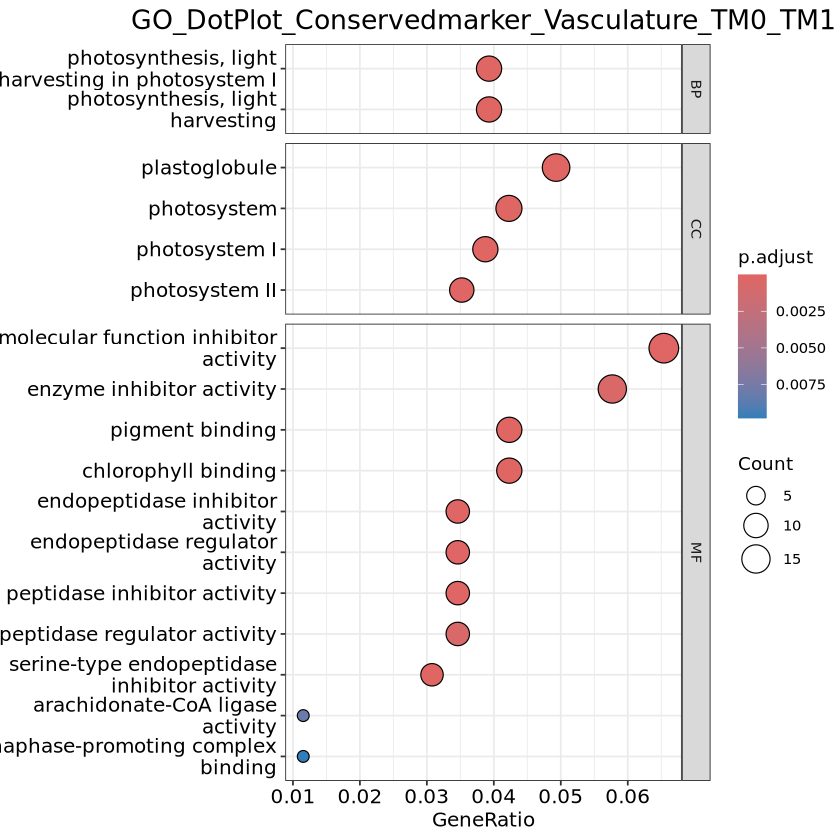

In [36]:
p1 <- dotplot(ego, showCategory = 30, split = "ONTOLOGY") +
    facet_grid(ONTOLOGY ~ ., scale = "free", space = "free") +
    scale_colour_gradient(low = "red", high = "blue") +  # 颜色标度仅在此处添加
    labs(title = str_c("GO_DotPlot_", file_prefix)) +
    base_theme
p1

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


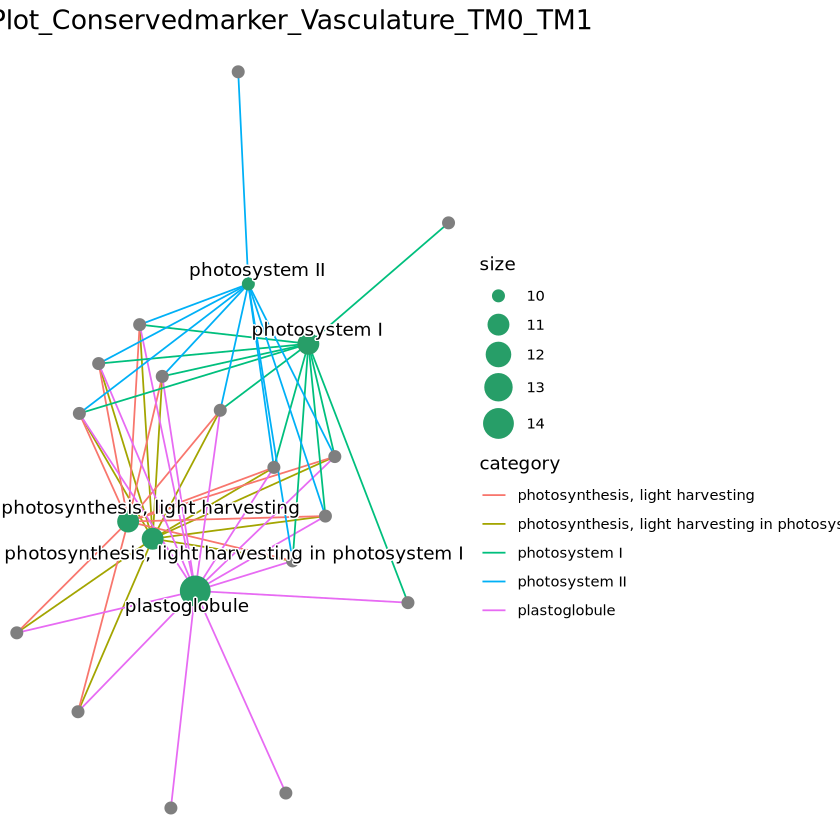

In [37]:
p2 <- cnetplot(
        ego,
        foldChange = geneList,
        showCategory = 5,
        node_label = "category",
        layout = 'kk',
        color_edge = "category",
        color_category = "#279e68",
        max.overlaps = Inf
    ) +
    labs(title = str_c("GO_CnetPlot_", file_prefix)) +
    base_theme + 
    scale_color_gradient2(low='darkblue', mid = "#ff7f0e", high='darkred')
p2

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


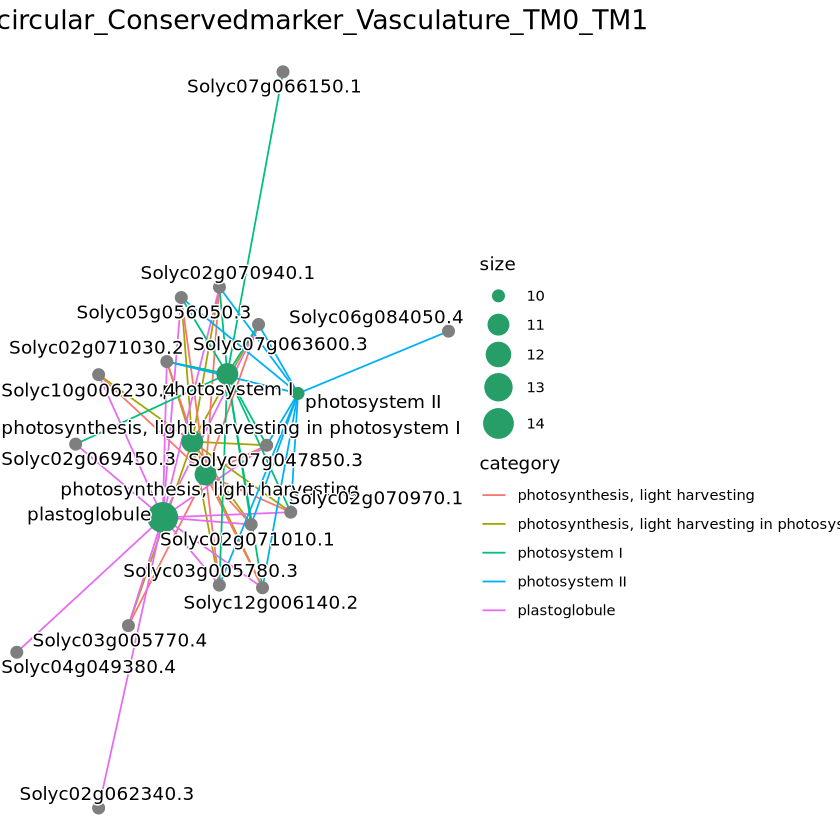

In [38]:
p3 <- cnetplot(
        ego,
        foldChange = geneList,
        showCategory = 5,
        layout = 'fr',
        node_label = "all",
        color_edge = "category",
        color_category = "#279e68",
        max.overlaps = Inf, 
        cex_label_gene = 0.4 
    ) +
    labs(title = str_c("GO_CnetPlot_circular_", file_prefix)) +
    base_theme + 
    scale_color_gradient2(low='darkblue', mid = "#ff7f0e", high='darkred')
p3

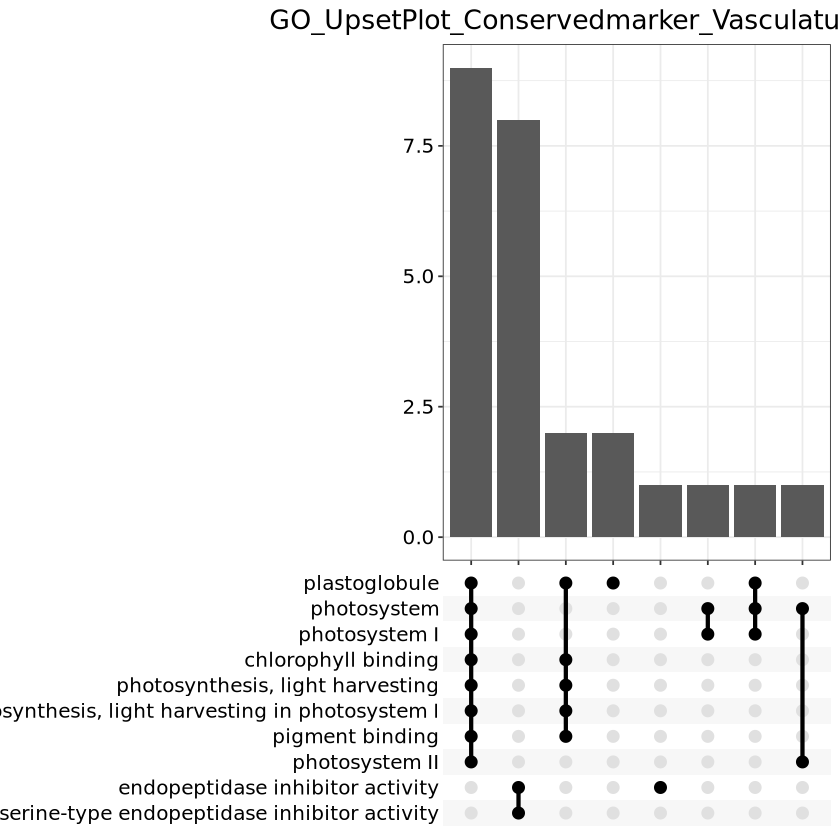

In [39]:
p4 <- upsetplot(ego) +
    labs(title = str_c("GO_UpsetPlot_", file_prefix)) +
    base_theme
p4

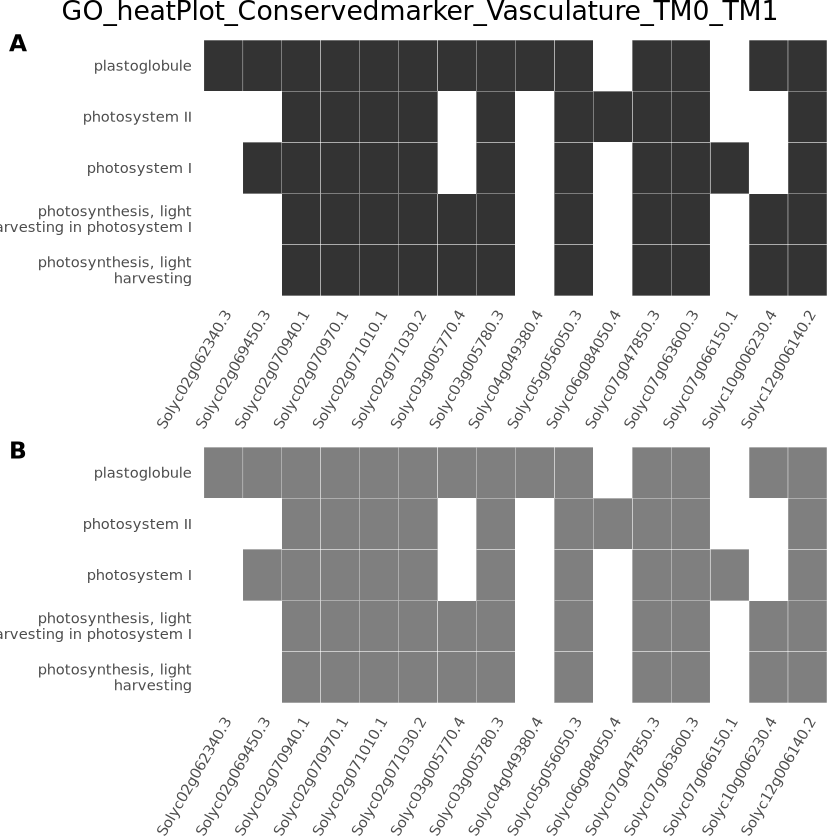

In [40]:
p5_1 <- heatplot(ego, showCategory=5)
p5_2 <- heatplot(ego, foldChange=geneList, showCategory=5)
p5 <- cowplot::plot_grid(p5_1, p5_2, ncol=1, labels=LETTERS[1:2]) + ggtitle(str_c("GO_heatPlot_", file_prefix)) + base_theme
p5

In [41]:
ego2 <- pairwise_termsim(ego)

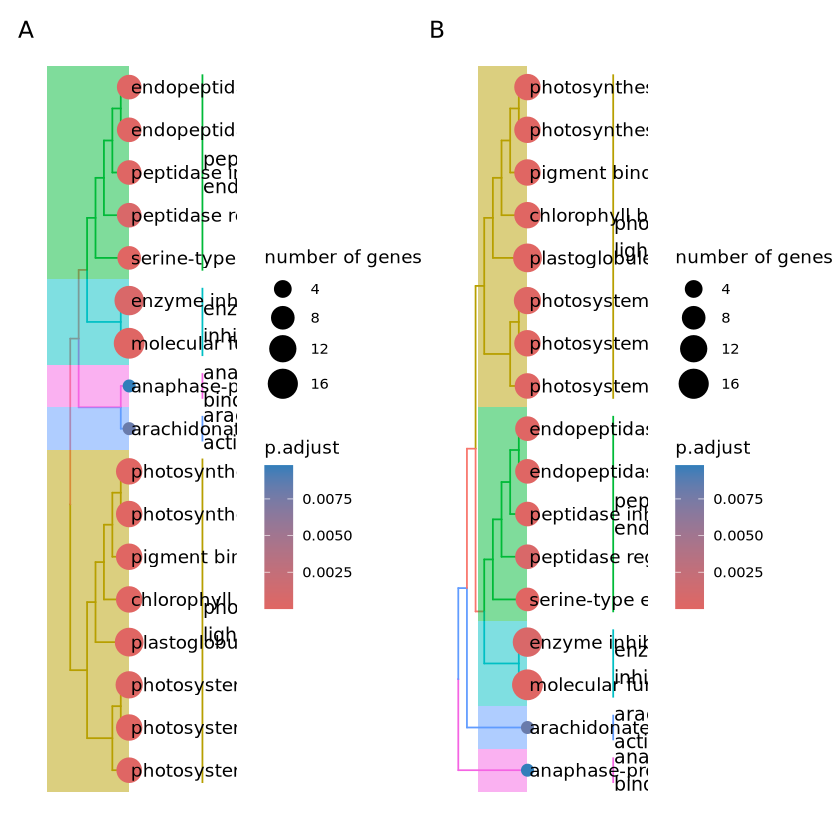

In [42]:
p6_1 <- treeplot(ego2)
p6_2 <- treeplot(ego2, cluster.params = list(method = "average"))
p6 <- aplot::plot_list(p6_1, p6_2, tag_levels='A')
p6

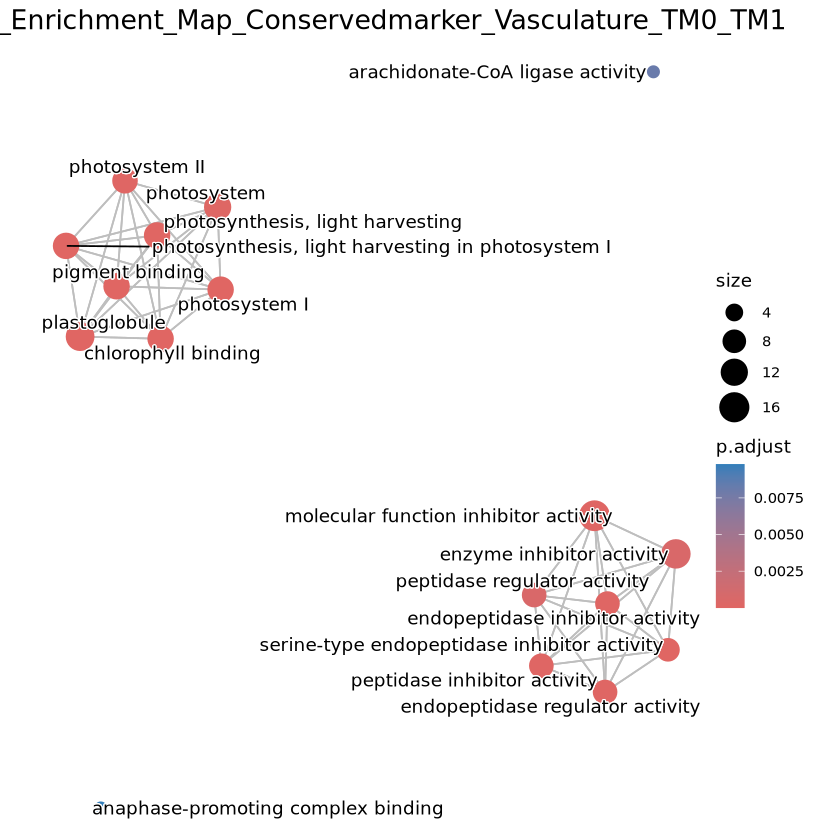

In [43]:
p7 <- emapplot(ego2, layout = 'fr') + ggtitle(str_c("GO_Enrichment_Map_", file_prefix)) + base_theme
p7

In [44]:
ego_BP <- enrichGO(
    gene = gene,
    OrgDb = Tomato,
    keyType = 'GID',
    ont = 'BP',
    qvalueCutoff = 0.05,
    pvalueCutoff = 0.05
)

Warning message:
"ggrepel: 52 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


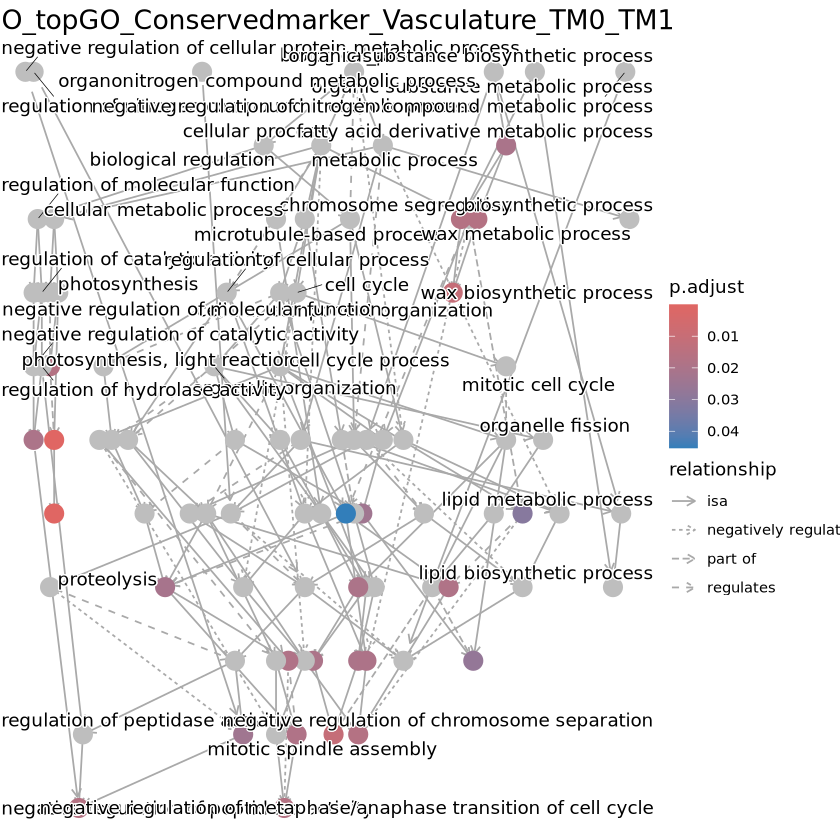

In [45]:
p8 <- goplot(ego_BP, showCategory = 10) + ggtitle(str_c("GO_topGO_", file_prefix)) + base_theme 
p8

In [46]:
write.csv(ego_df, str_c(folder_target, file_prefix, "_df_go.csv"), row.names = FALSE)

In [47]:
kk<- enricher(gene,TERM2GENE = kegg2gene,TERM2NAME = kegg2name,pvalueCutoff = 0.05,qvalueCutoff = 0.05)
kk_df <- as.data.frame(kk)
write.csv(kk_df, str_c(folder_target, file_prefix, "_df_kegg.csv"), row.names = FALSE)

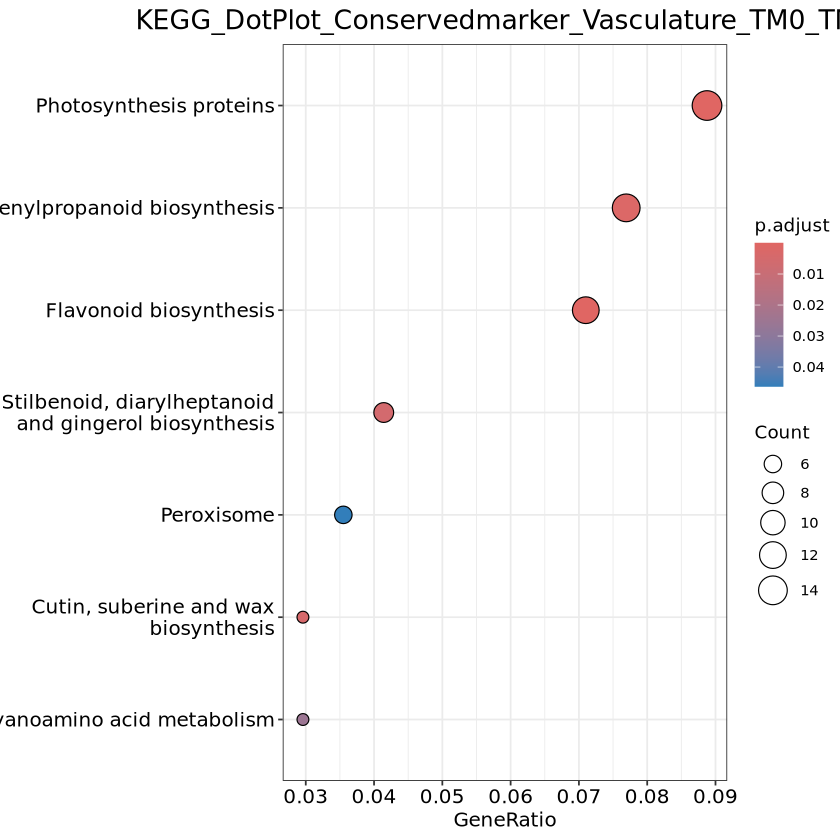

In [49]:
p9 <- dotplot(kk,showCategory = 30) +
    labs(title = str_c("KEGG_DotPlot_", file_prefix)) + 
    base_theme
p9

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


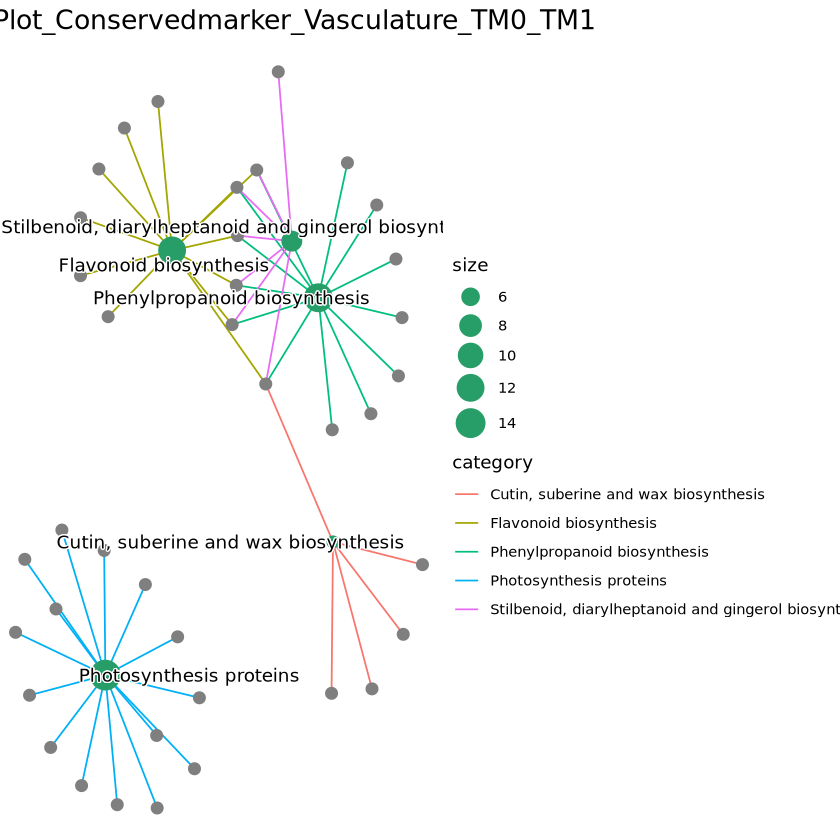

In [50]:
p10 <- cnetplot(
        kk,
        foldChange = geneList,
        showCategory = 5,
        node_label = "category",
        layout = 'kk',
        color_edge = "category",
        color_category = "#279e68",
        max.overlaps = Inf
    ) +
    labs(title = str_c("KEGG_CnetPlot_", file_prefix)) +
    base_theme + 
    scale_color_gradient2(low='darkblue', mid = "#ff7f0e", high='darkred')
p10

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


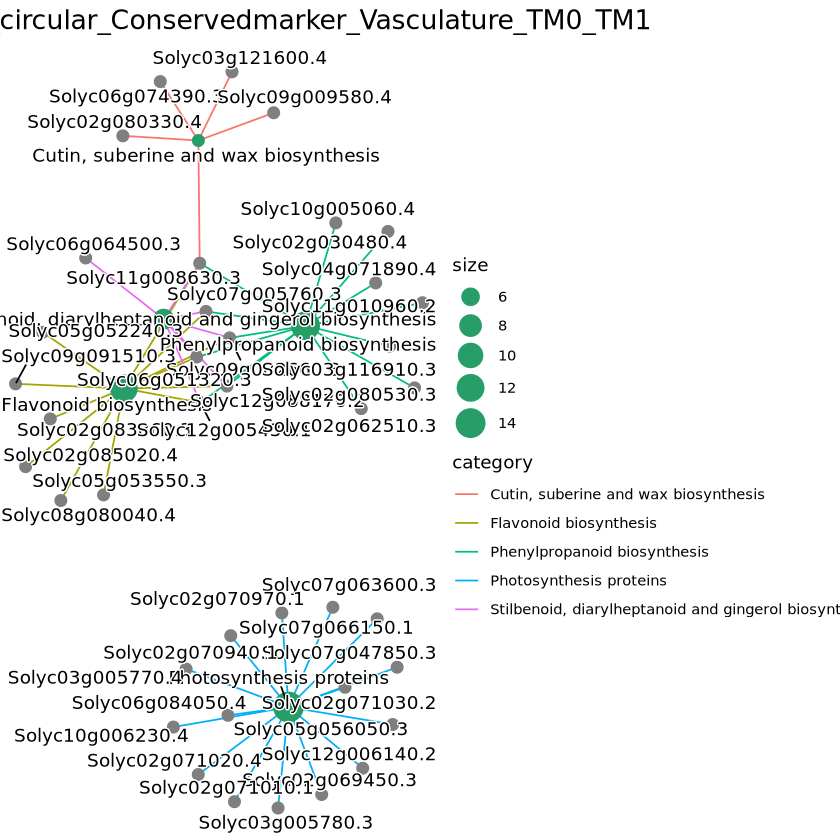

In [51]:
p11 <- cnetplot(
        kk,
        foldChange = geneList,
        showCategory = 5,
        node_label = "all",
        layout = 'fr',
        color_category = "#279e68",
        color_edge = "category",
        max.overlaps = Inf,
        cex_label_gene = 0.6  
    ) +
    labs(title = str_c("KEGG_CnetPlot_circular_", file_prefix)) +
    base_theme + 
    scale_color_gradient2(low='darkblue', mid = "#ff7f0e", high='darkred')
p11

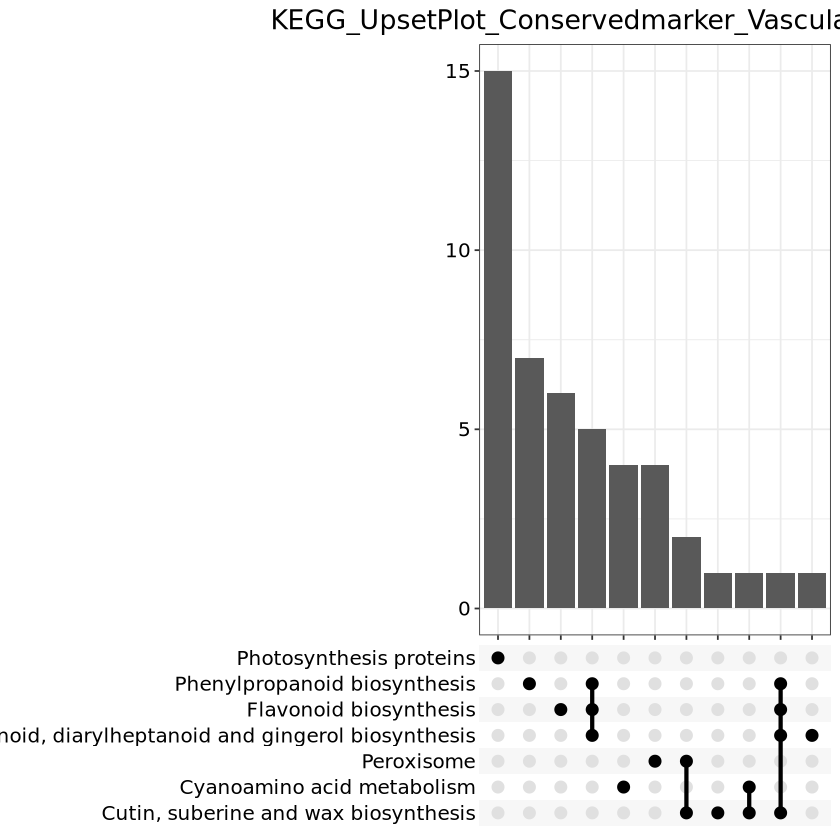

In [52]:
p12 <- upsetplot(kk) +
    labs(title = str_c("KEGG_UpsetPlot_", file_prefix)) +
    base_theme
p12

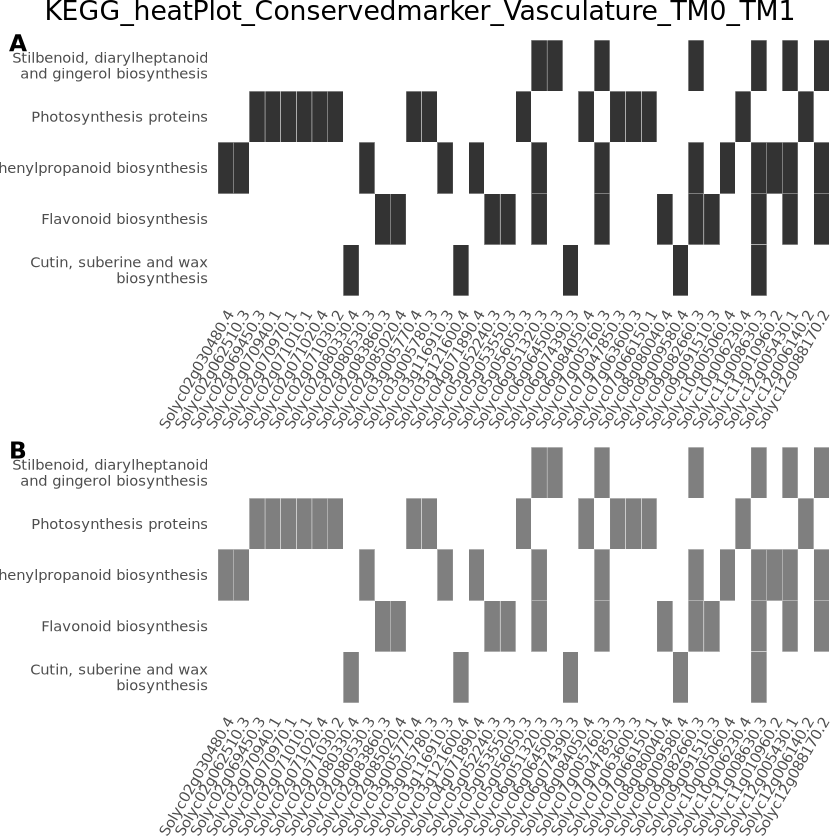

In [53]:
p13_1 <- heatplot(kk, showCategory=5)
p13_2 <- heatplot(kk, foldChange=geneList, showCategory=5)
p13 <- cowplot::plot_grid(p13_1, p13_2, ncol=1, labels=LETTERS[1:2]) + ggtitle(str_c("KEGG_heatPlot_", file_prefix)) + base_theme
p13

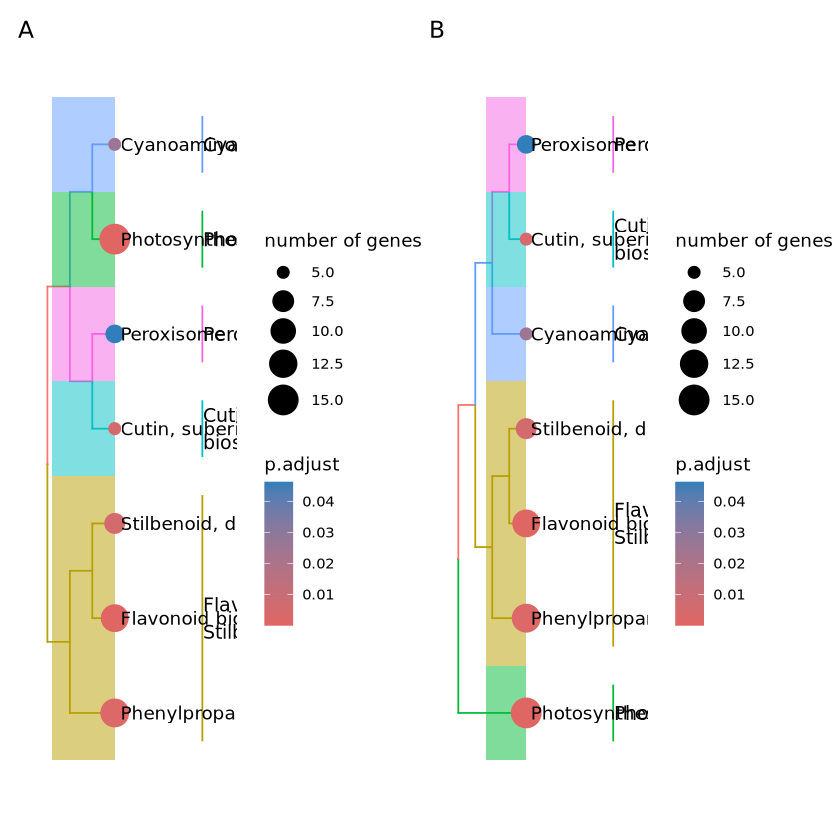

In [54]:
kk2 <- pairwise_termsim(kk)
p14_1 <- treeplot(kk2)
p14_2 <- treeplot(kk2, cluster.params = list(method = "average"))
p14 <- aplot::plot_list(p14_1, p14_2, tag_levels='A')
p14

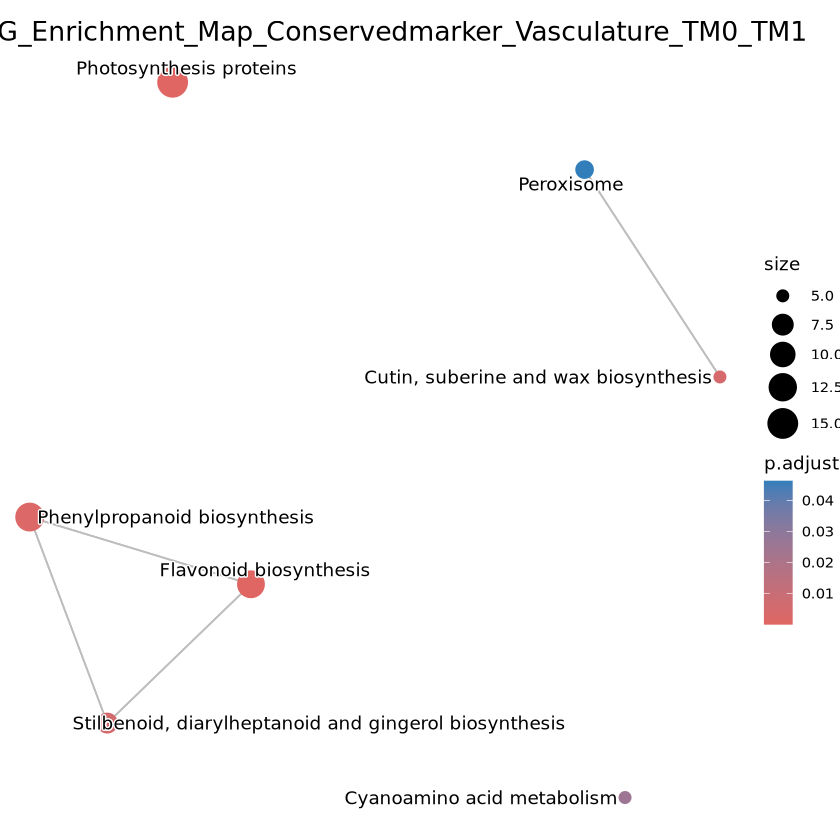

In [55]:
p15 <- emapplot(kk2, layout = 'fr') + ggtitle(str_c("KEGG_Enrichment_Map_", file_prefix)) + base_theme
p15

In [39]:
pdf(str_c(folder_target, file_prefix, "_GO_dotplot.pdf"), height = 30, width = 8)
print(p1)
dev.off()

pdf(str_c(folder_target, file_prefix, "_KEGG_dotplot.pdf"), height = 10, width = 8)
print(p9)
dev.off()

pdf(str_c(folder_target, file_prefix, "_cnet.pdf"), height = 15, width = 18)
print(p2)
print(p3)
print(p4)
print(p7)
print(p10)
print(p11)
print(p12)
print(p15)
dev.off() 
    
pdf(str_c(folder_target, file_prefix, "_heatplot.pdf"), height = 15, width = 30)
print(p5)
print(p6)
print(p8)
wordcloud(words = ego_BP$Description, freq = ego_BP$Count, scale=(c(3, .1)), colors=brewer.pal(8, "Dark2"), max.words = 25)
print(p13)
print(p14)
wordcloud(words = kk$Description, freq = kk$Count, scale=(c(3, .1)), colors=brewer.pal(8, "Dark2"), max.words = 25)
dev.off() 

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


In [56]:
dir = '/data/work/output/FGSEA/'
file = file_target_deg

dir.create(dir, recursive = TRUE, showWarnings = FALSE)

pathwayLines_go <- strsplit(readLines(gmt_go), "\t")
TomatoGOPathways <- lapply(pathwayLines_go, tail, -2)
names(TomatoGOPathways) <- sapply(pathwayLines_go, head, 1)

pathwayLines_kegg <- strsplit(readLines(gmt_kegg), "\t")
TomatoKEGGPathways <- lapply(pathwayLines_kegg, tail, -2)
names(TomatoKEGGPathways) <- sapply(pathwayLines_kegg, head, 1)

In [61]:
data <- read.csv(file, row.names = 1) 

deg <- rownames_to_column(data, var = "Gene") %>%
    filter(!is.na(Gene) & !duplicated(Gene))
head(deg)
head(deg$Gene)
deg$Gene <- sub("^gene:", "", deg$Gene)
head(deg)
TomatoGORanks <- deg$log2fc 
names(TomatoGORanks) <- deg$Gene 
TomatoGORanks <- sort(TomatoGORanks, decreasing = F) 

,Gene,TM1_p_val,TM1_avg_log2FC,TM1_pct.1,TM1_pct.2,TM1_p_val_adj,TM0_p_val,TM0_avg_log2FC,TM0_pct.1,TM0_pct.2,TM0_p_val_adj,max_pval,minimump_p_val,log2fc
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,MT-rrn26,1.183961e-237,2.023743,0.756,0.576,3.384588e-233,0.000000e+00,2.3788432,0.712,0.367,0.000000e+00,1.183961e-237,0.000000e+00,2.201293
2,gene:Solyc12g056290.2,6.746384e-274,2.751336,0.487,0.187,1.928589e-269,1.329808e-110,3.1164080,0.256,0.073,3.801523e-106,1.329808e-110,1.349277e-273,2.933872
3,gene:Solyc00g500164.1,9.578979e-158,1.801340,0.633,0.438,2.738343e-153,8.739389e-84,2.4489730,0.250,0.097,2.498329e-79,8.739389e-84,1.915796e-157,2.125157
4,gene:Solyc00g160750.1,1.060475e-152,2.217754,0.418,0.195,3.031581e-148,3.638643e-35,2.1254329,0.108,0.047,1.040179e-30,3.638643e-35,2.120951e-152,2.171594
5,gene:Solyc07g007755.2,5.234449e-117,-1.423717,0.424,0.656,1.496372e-112,2.075218e-84,-0.8138965,0.424,0.661,5.932427e-80,2.075218e-84,1.046890e-116,-1.118807
6,gene:Solyc10g048060.2,3.172158e-92,1.919658,0.271,0.109,9.068249e-88,1.311619e-33,1.5973086,0.101,0.048,3.749525e-29,1.311619e-33,6.344316e-92,1.758484


[1] "MT-rrn26"              "gene:Solyc12g056290.2" "gene:Solyc00g500164.1"
[4] "gene:Solyc00g160750.1" "gene:Solyc07g007755.2" "gene:Solyc10g048060.2"

,Gene,TM1_p_val,TM1_avg_log2FC,TM1_pct.1,TM1_pct.2,TM1_p_val_adj,TM0_p_val,TM0_avg_log2FC,TM0_pct.1,TM0_pct.2,TM0_p_val_adj,max_pval,minimump_p_val,log2fc
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,MT-rrn26,1.183961e-237,2.023743,0.756,0.576,3.384588e-233,0.000000e+00,2.3788432,0.712,0.367,0.000000e+00,1.183961e-237,0.000000e+00,2.201293
2,Solyc12g056290.2,6.746384e-274,2.751336,0.487,0.187,1.928589e-269,1.329808e-110,3.1164080,0.256,0.073,3.801523e-106,1.329808e-110,1.349277e-273,2.933872
3,Solyc00g500164.1,9.578979e-158,1.801340,0.633,0.438,2.738343e-153,8.739389e-84,2.4489730,0.250,0.097,2.498329e-79,8.739389e-84,1.915796e-157,2.125157
4,Solyc00g160750.1,1.060475e-152,2.217754,0.418,0.195,3.031581e-148,3.638643e-35,2.1254329,0.108,0.047,1.040179e-30,3.638643e-35,2.120951e-152,2.171594
5,Solyc07g007755.2,5.234449e-117,-1.423717,0.424,0.656,1.496372e-112,2.075218e-84,-0.8138965,0.424,0.661,5.932427e-80,2.075218e-84,1.046890e-116,-1.118807
6,Solyc10g048060.2,3.172158e-92,1.919658,0.271,0.109,9.068249e-88,1.311619e-33,1.5973086,0.101,0.048,3.749525e-29,1.311619e-33,6.344316e-92,1.758484


In [62]:
fgseaRes <- fgsea(pathways = TomatoGOPathways, 
                  stats = TomatoGORanks,
                  eps = 0.0,
                  minSize = 15,
                  maxSize = 500)

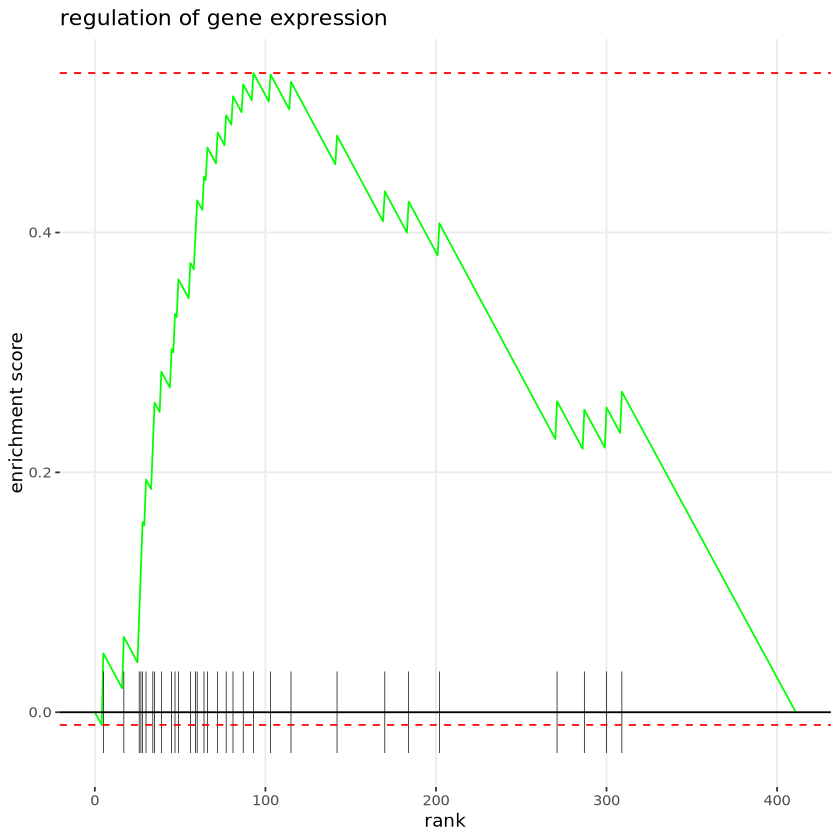

In [63]:
p1 <- plotEnrichment(TomatoGOPathways[[head(fgseaRes[order(pval), ], 1)$pathway]],
                         TomatoGORanks) + labs(title = head(fgseaRes[order(pval), ], 1)$pathway)
p1

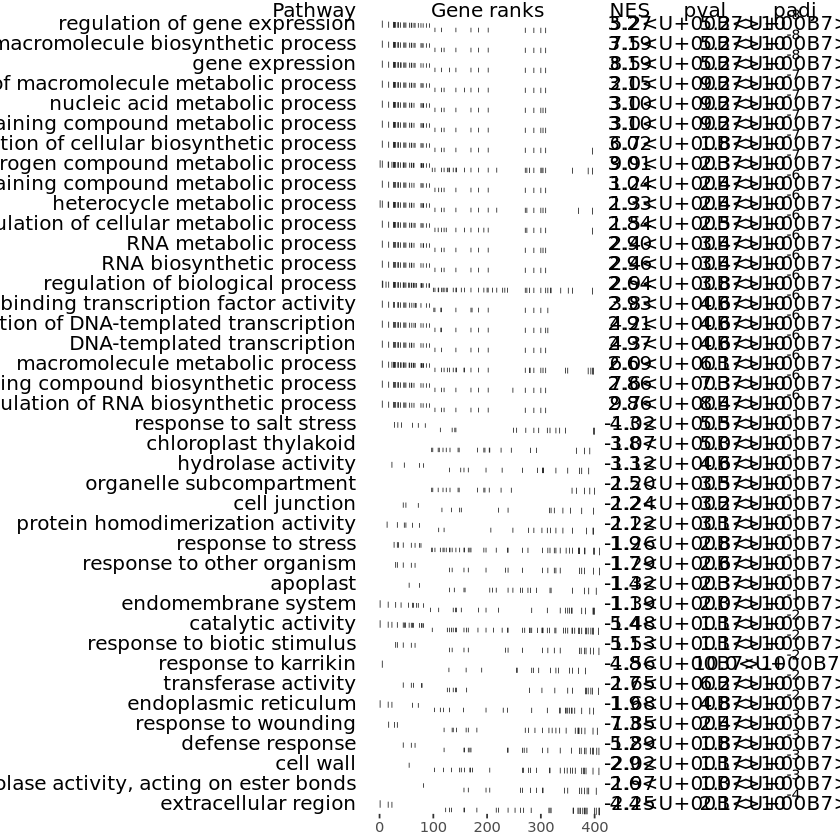

In [64]:
topPathwaysUp <- fgseaRes[ES > 0][head(order(pval), n = 20), pathway]
topPathwaysDown <- fgseaRes[ES < 0][head(order(pval), n = 20), pathway]
topPathways <- c(topPathwaysUp, rev(topPathwaysDown))
p2 <- plotGseaTable(TomatoGOPathways[topPathways], TomatoGORanks, fgseaRes, gseaParam = 0.5)
p2

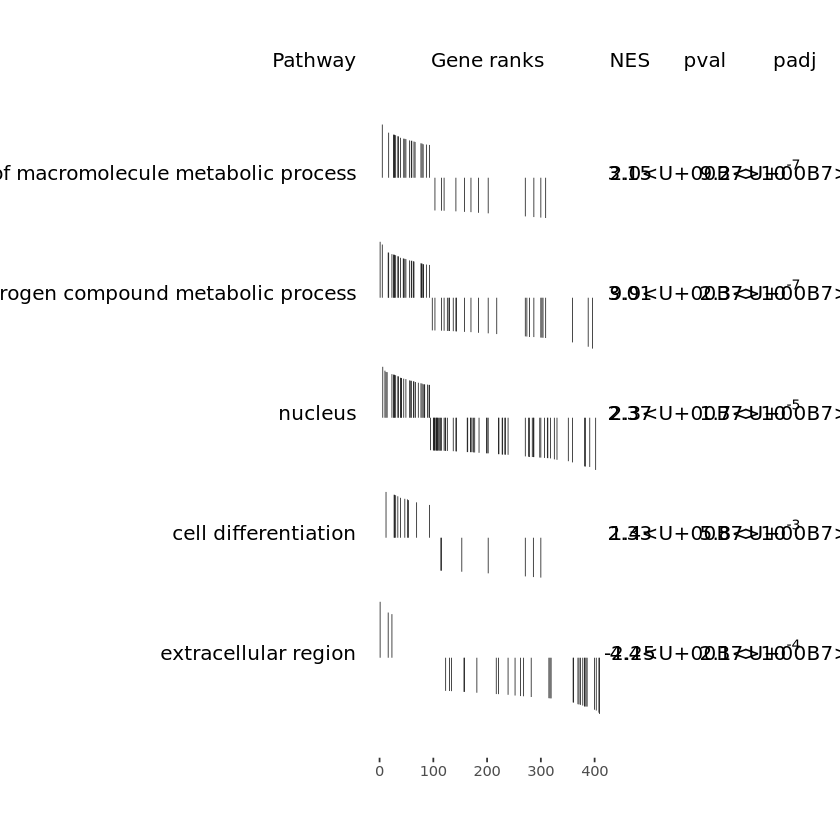

In [65]:
collapsedPathways <- collapsePathways(fgseaRes[order(pval)][padj < 0.01], TomatoGOPathways, TomatoGORanks)

mainPathways <- fgseaRes[pathway %in% collapsedPathways$mainPathways][order(-NES), pathway]

p3 <- plotGseaTable(TomatoGOPathways[mainPathways], TomatoGORanks, fgseaRes, gseaParam = 0.5)

p3

In [66]:
TomatoKEGGRanks <- deg$log2fc 
names(TomatoKEGGRanks) <- deg$Gene 
TomatoKEGGRanks <- sort(TomatoKEGGRanks, decreasing = F) 

fgseaRes_kegg <- fgsea(pathways = TomatoKEGGPathways, 
                       stats = TomatoKEGGRanks,
                       eps = 0.0,
                       minSize = 15,
                       maxSize = 500)

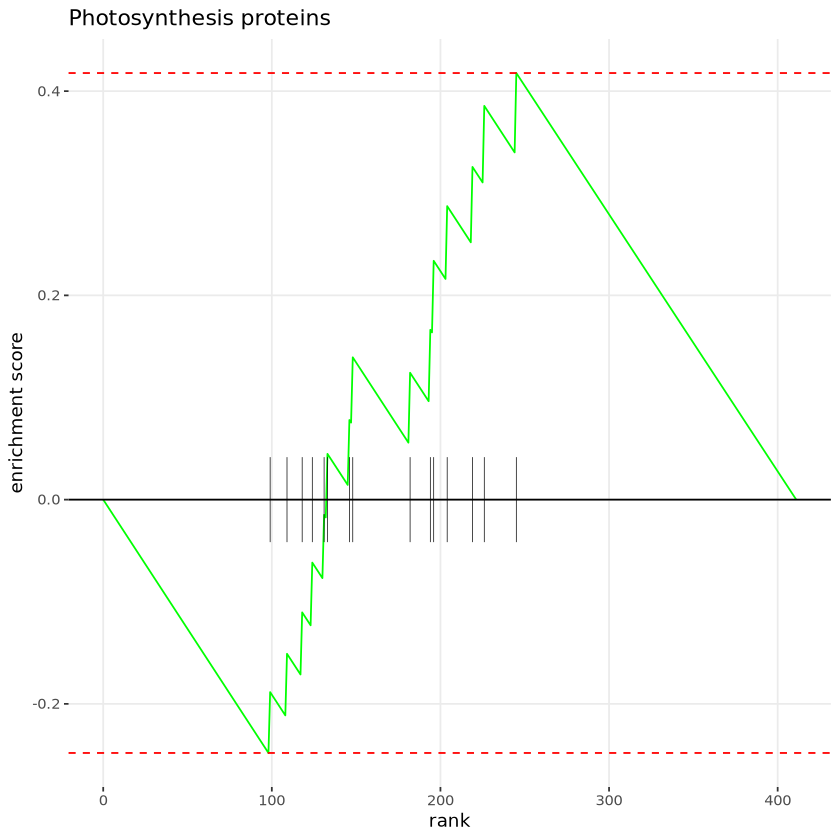

In [67]:
p4 <- plotEnrichment(TomatoKEGGPathways[[head(fgseaRes_kegg[order(pval), ], 1)$pathway]],
                         TomatoKEGGRanks) + labs(title = head(fgseaRes_kegg[order(pval), ], 1)$pathway)
p4

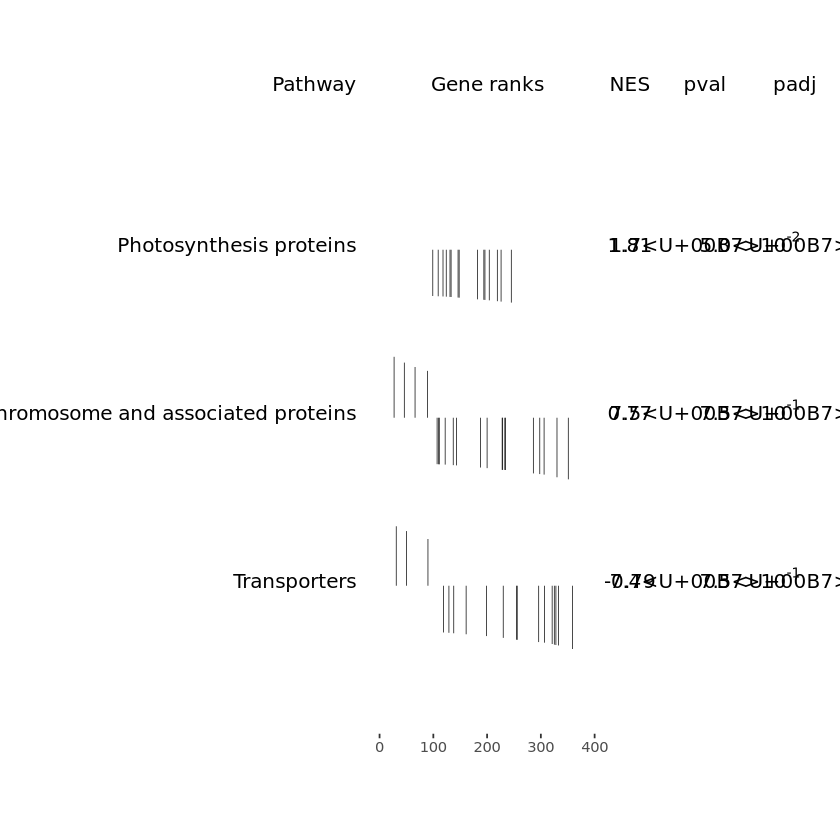

In [68]:
topPathwaysUp_kegg <- fgseaRes_kegg[ES > 0][head(order(pval), n = 20), pathway]
topPathwaysDown_kegg <- fgseaRes_kegg[ES < 0][head(order(pval), n = 20), pathway]
topPathways_kegg <- c(topPathwaysUp_kegg, rev(topPathwaysDown_kegg))
p5 <- plotGseaTable(TomatoKEGGPathways[topPathways_kegg], TomatoKEGGRanks, fgseaRes_kegg, gseaParam = 0.5)
p5

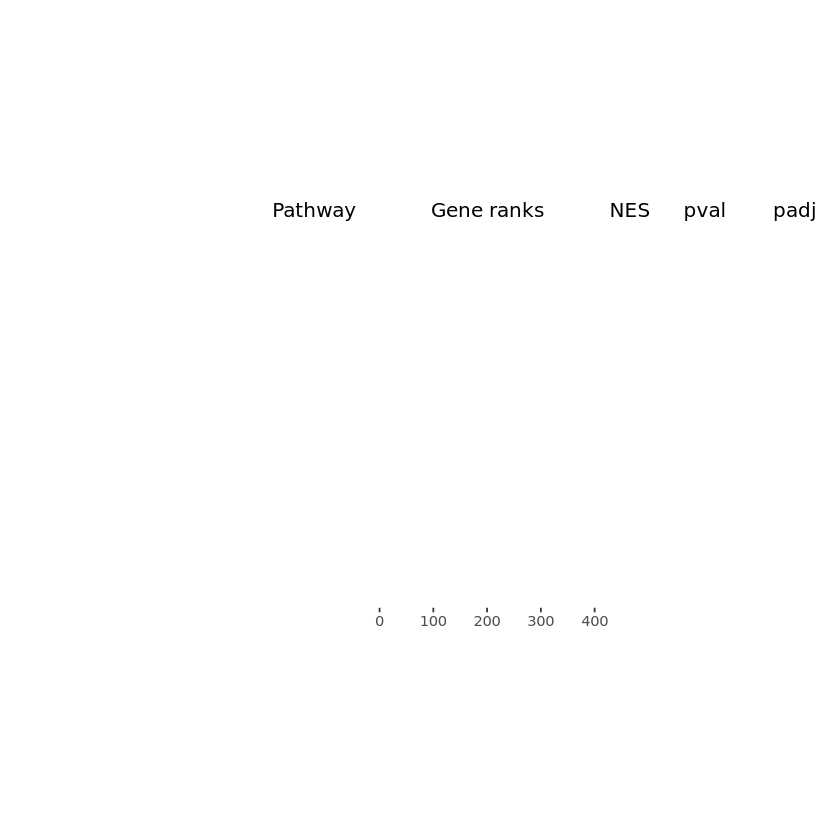

In [69]:
collapsedPathways_kegg <- collapsePathways(fgseaRes_kegg[order(pval)][padj < 0.01], TomatoKEGGPathways, TomatoKEGGRanks)

mainPathways_kegg <- fgseaRes_kegg[pathway %in% collapsedPathways_kegg$mainPathways][order(-NES), pathway]

p6 <- plotGseaTable(TomatoKEGGPathways[mainPathways_kegg], TomatoKEGGRanks, fgseaRes_kegg, gseaParam = 0.5)

p6

In [ ]:
pdf(str_c(dir, file_path_sans_ext(basename(file)), "_lof2fc.pdf"), height = 15, width = 15)
print(p1)
print(p2)
print(p3)
print(p4)
print(p5)
print(p6)
dev.off()

In [ ]:
Toppathway <- fgseaRes[order(pval),][1,]$pathway
leadingEdgegenes <- fgseaRes[order(pval),][1,]$leadingEdge
leadingEdgegenes_df <- data.frame(leadingEdgegenes)
names(leadingEdgegenes_df) <- Toppathway

write.csv(leadingEdgegenes_df,file = str_c(dir, file_path_sans_ext(basename(file)), "_go_leadingEdgegenes.csv"),row.names = FALSE)

In [59]:
Toppathway_kegg <- fgseaRes_kegg[order(pval),][1,]$pathway
leadingEdgegenes_kegg <- fgseaRes_kegg[order(pval),][1,]$leadingEdge
leadingEdgegenes_df_kegg <- data.frame(leadingEdgegenes_kegg)
names(leadingEdgegenes_df_kegg) <- Toppathway_kegg

write.csv(leadingEdgegenes_df_kegg,file = str_c(dir, file_path_sans_ext(basename(file)), "_kegg_leadingEdgegenes.csv"),row.names = FALSE)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (4.72% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
"There were 40 pathways for which P-values were not calculated properly due to unbalanced (positive and negative) gene-level statistic values. For such pathways pval, padj, NES, log2err are set to NA. You can try to increase the value of the argument nPermSimple (for example set it nPermSimple = 10000)"
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
"For some of the pathways the P-values were likely overestimated. For such pathways log2err is set to NA."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (4.87% of the list).
The order of t

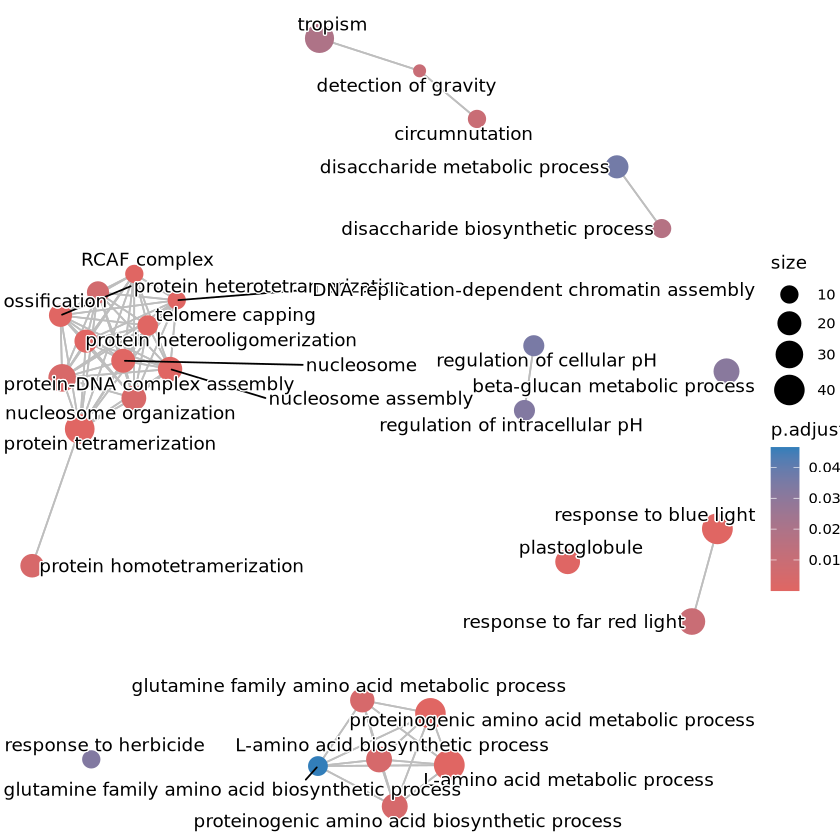

In [23]:
# 用于比较两个时期的基因富集通路占比，杨东可以尝试调试一下，搞不定就先放弃，参考链接：https://yulab-smu.top/biomedical-knowledge-mining-book/clusterprofiler-comparecluster.html

# library(clusterProfiler)
# data(gcSample)
# xx <- compareCluster(gcSample, fun="enrichKEGG",
#                      organism="hsa", pvalueCutoff=0.05)
# xx <- pairwise_termsim(xx)                     
# p1 <- emapplot(xx)
# p2 <- emapplot(xx, legend_n=2) 
# p3 <- emapplot(xx, pie="count")
# p4 <- emapplot(xx, pie="count", cex_category=1.5, layout="kk")
# cowplot::plot_grid(p1, p2, p3, p4, ncol=2, labels=LETTERS[1:4])